In [1]:
import quandl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


quandl.ApiConfig.api_key = "<Your Key Here>"
data = quandl.get("EURONEXT/ABI")
data.head()

,Open,High,Low,Last,Volume,Turnover
Date,,,,,,
2014-02-14,73.30,73.92,72.80,73.92,1396051.0,1.026420e+08
2014-02-17,74.70,74.73,74.11,74.27,726634.0,5.406427e+07
2014-02-18,74.76,74.76,73.48,73.80,1091796.0,8.063149e+07
2014-02-19,73.36,74.23,73.01,74.04,1151039.0,8.477354e+07
2014-02-20,73.03,74.15,72.64,74.03,1325701.0,9.744472e+07


In [3]:
data.shape

(1540, 6)

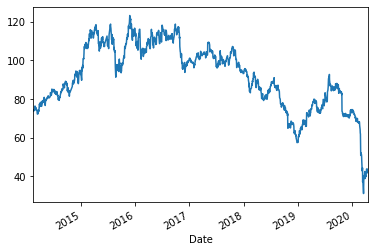

In [3]:
data['Last'].plot()

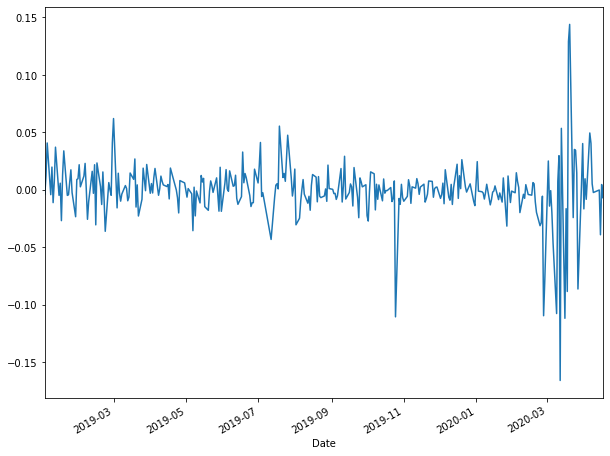

In [41]:
#Create new columns price difference and return in the dataframe
data['PriceDiff'] = data['Last'].shift(1) - data['Last']
data['Return']= data['PriceDiff']/data['Last']

#Easier way to calculate the daily change
#See https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pct_change.html
data['DailyChange']=data['Last'].pct_change(periods=1)
dailychanges = data['DailyChange']

plt.figure(figsize=(10,8))
data['DailyChange'].loc['2019-01-01':'2020-04-17'].plot()
plt.show()

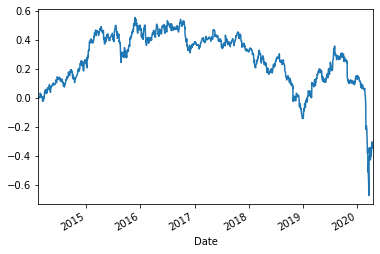

In [37]:
df_cumsum = dailychanges.cumsum()
df_cumsum.plot()



count    1539.000000
mean       -0.000227
std         0.016838
min        -0.166083
25%        -0.007519
50%         0.000000
75%         0.006913
max         0.144001
Name: DailyChange, dtype: float64

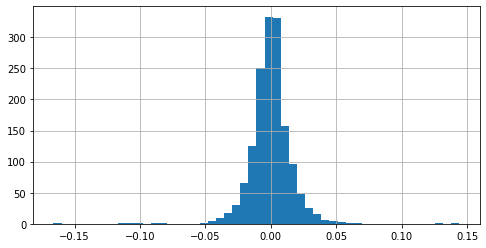

In [36]:
#Plot a histogram to see the distribution of the returns
dailychanges.hist(bins=50,figsize=(8,4))
#Summary statistics of the dataframe - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html?highlight=describe#pandas.DataFrame.describe
dailychanges.describe()

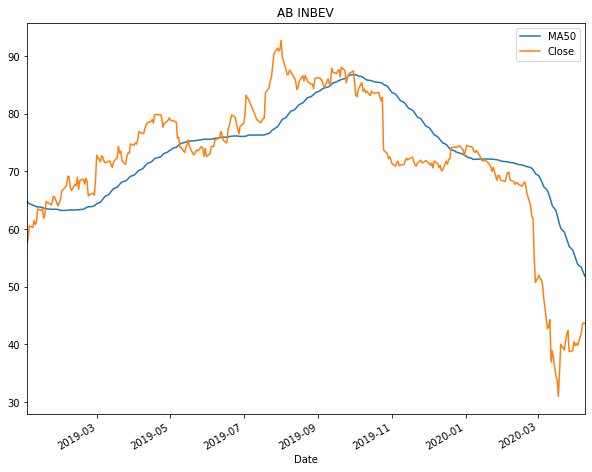

In [5]:
#Create a new column 50-day moving average in the dataframe
data['ma50']= data['Last'].rolling(50).mean()

#plot the moving average
plt.figure(figsize=(10,8))
data['ma50'].loc['2019-01-01':'2020-04-09'].plot(label='MA50')
data['Last'].loc['2019-01-01':'2020-04-09'].plot(label='Close')
plt.title('AB INBEV')
plt.legend()
plt.show()

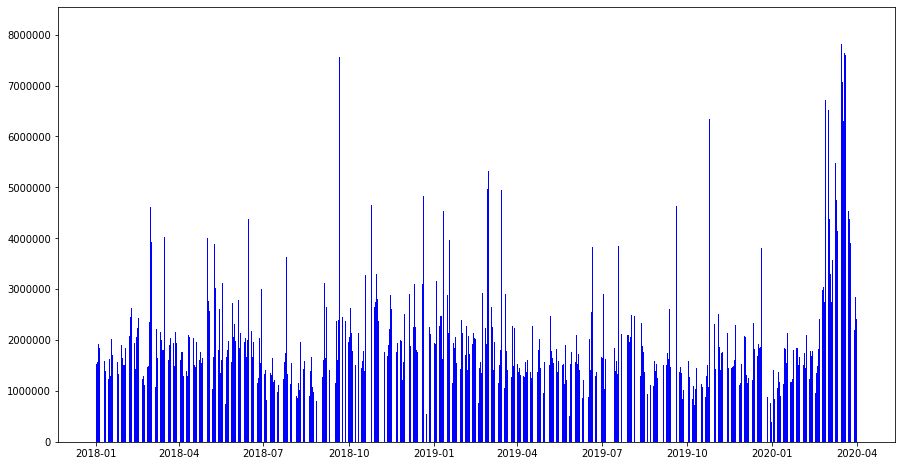

In [13]:
#Short notation to plot the 'Volume' column of the dataframe
#data.Volume.plot()

#Only plot the volume from 2018 to 2020
volume = data['Volume'].loc['2018-01-01':'2020-04-01']
fig,ax = plt.subplots(1)
days = pd.to_datetime(volume.index, format='%Y%m%d')
bars = ax.bar(np.array(days),volume,facecolor='b')

#gcf() means get current figure, 12 inches wide and 8 inches high
plt.gcf().set_size_inches(15,8)


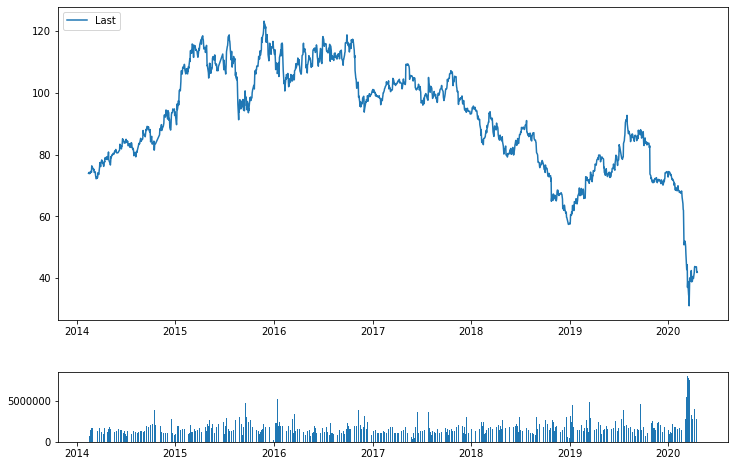

In [11]:
prices=data['Last']
volumes=data['Volume']

top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
top.plot(prices.index,prices,label='Last')

plt.title= 'AB INBEV Prices and Volume 2015-2020'
plt.legend(loc=2)

bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
bottom.bar(volumes.index,volumes)
plt.title='AB INBEV trading volume'

plt.gcf().set_size_inches(12,8)
plt.subplots_adjust(hspace=0.75)
